In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf 
import random
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [38]:
def load_and_preprocess_data():
    (trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
    
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    
    trainY_cat = tf.keras.utils.to_categorical(trainY)
    testY_cat = tf.keras.utils.to_categorical(testY)
    
    trainX_norm = trainX.astype('float32')/255.0
    testX_norm = testX.astype('float32')/255.0
    
    return trainX_norm, trainY_cat, testX_norm, testY_cat
    

In [39]:
def create_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1),name="convo-layer-1"),
        tf.keras.layers.AvgPool2D(pool_size=(2,2),name="pooling-layer-1"),
        tf.keras.layers.Conv2D(32, kernel_size=(3,3),padding='same',activation='relu', name="convo-layer-2"),
        tf.keras.layers.AvgPool2D(pool_size=(2,2),name="pooling-layer-2"),
        tf.keras.layers.GlobalAveragePooling2D(name="pooling-layer-3"),
        tf.keras.layers.Dense(10,activation='softmax', name="output-layer"),
    ])
    
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
    return model 

In [40]:
def train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10):
    history = model.fit(trainX, trainY_cat, epochs=epochs, validation_data=(testX, testY_cat))
    return history

In [43]:
def visualize_random_prediction(model, testX, testY_cat, class_names):
    images=[]
    labels=[]
    random_indices= random.sample(range(len(testX)),10)
    
    for idx in random_indices:
        images.append(testX[idx])
        labels.append(testY_cat[idx])
        
    images = np.array(images)
    labels = np.array(labels)
    
    fig = plt.figure(figsize=(20,8))
    rows, cols = 2, 5 
    x = 1
    
    for image, label in zip(images,labels):
        fig.add_subplot(rows, cols, x)
        prediction = model.predict(tf.expand_dims(image,axis=0))
        predicted_label=class_names[tf.argmax(prediction.flatten())]
        true_label=class_names[tf.argmax(label)]
        plt.title(f"True label:  {true_label}, Predicted label: {predicted_label}")
        plt.imshow(image/255.)
        plt.axis("off")
        x+=1

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.4391 - loss: 1.5634 - val_accuracy: 0.6863 - val_loss: 0.9267
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6943 - loss: 0.8813 - val_accuracy: 0.7310 - val_loss: 0.7947
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7332 - loss: 0.7665 - val_accuracy: 0.7581 - val_loss: 0.7182
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7582 - loss: 0.7020 - val_accuracy: 0.7803 - val_loss: 0.6656
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7729 - loss: 0.6556 - val_accuracy: 0.7655 - val_loss: 0.6465
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7882 - loss: 0.6150 - val_accuracy: 0.7755 - val_loss: 0.6359
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.7932 - loss: 0.5985 - val_accuracy: 0.7982 - val_loss: 0.5904
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8015 -

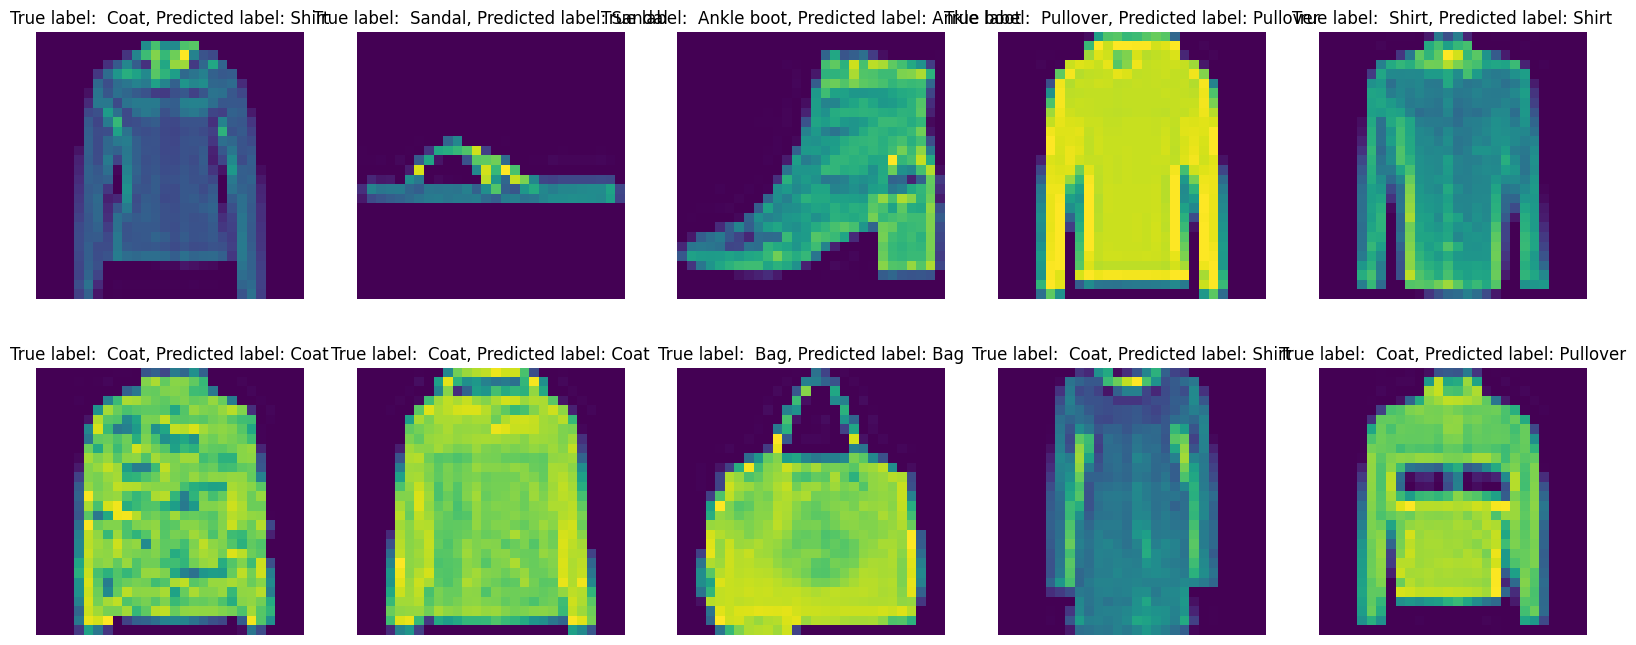

In [44]:
trainX, trainY_cat, testX, testY_cat = load_and_preprocess_data()
class_names=['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model = create_cnn_model()
history= train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10)
visualize_random_prediction(model, testX, testY_cat, class_names)


In [45]:
class_names

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']